## Observations and Insights 

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [62]:
# Checking the number of mice.
mouse_count = merged_data["Mouse ID"].count()
mouse_count

1893

In [63]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset="Mouse ID", keep='first', inplace=False, ignore_index=False)
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [65]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(clean_data["Mouse ID"].unique())
mouse_count2


249

## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumorvol_means = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumorvol_medians = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumorvol_variance = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumorvol_std = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumorvol_sem = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean of Tumor Volume":tumorvol_means,
                           "Median of Tumor Volume":tumorvol_medians,
                           "Variance of Tumor Volume":tumorvol_variance,
                           "Standard Deviation of Tumor Volume":tumorvol_std,
                           "Standard Error of Tumor Volume":tumorvol_sem})
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df


,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
merged_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [68]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measurements = merged_data['Drug Regimen'].value_counts()
drug_measurements_chart.set_xlabel("Drug Regimen")
drug_measurements_chart.set_ylabel("Count of Measurements")
drug_measurements_chart = drug_measurements.plot(kind="bar",title="Count of Measurements by Drug Regimen")

NameError: name 'drug_measurements_chart' is not defined

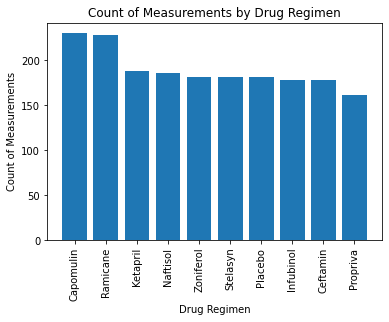

In [69]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_measurements))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_measurements.index.values)
plt.bar(x_axis,drug_measurements)
plt.title("Count of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Measurements")
plt.xticks(rotation='vertical')
plt.show()

Text(0, 0.5, '')

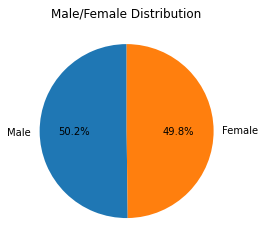

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = clean_data["Sex"].value_counts()

sex_chart = sex_data.plot.pie(autopct="%1.1f%%", startangle=90, title="Male/Female Distribution")

sex_chart.set_ylabel("")

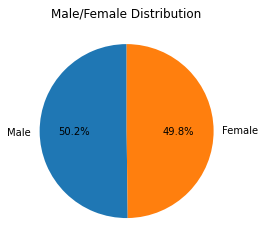

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_data, labels=sex_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title("Male/Female Distribution")

plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = pd.DataFrame(merged_data.groupby("Mouse ID")["Timepoint"].max().sort_values())
max_time = max_time.reset_index()
max_time = max_time.rename(columns={"Timepoint":"Max Timepoint"})
max_time
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_max_time = pd.merge(merged_data, max_time, on="Mouse ID")
merge_max_time.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:

    drug_df = merge_max_time.loc[merge_max_time["Drug Regimen"] == drug]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvol_df = drug_df.loc[drug_df["Timepoint"] == drug_df["Max Timepoint"]]
    
    # add subset 
    volume = tumorvol_df["Tumor Volume (mm3)"]
    tumorvol.append(volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([.25,.5,.75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    iqrange= (upper - lower).round(decimals=2)
    print(f"The inner quartile range for {drug} is {iqrange}.")
    
    lower_b = (lower - (1.5*iqrange)).round(decimals=2)
    upper_b = upper + (1.5*iqrange)
    print(f"The lower bound for {drug} is {lower_b}.")
    
    outliers = (volume.loc[(tumorvol_df["Tumor Volume (mm3)"] >= upper_b) | (tumorvol_df["Tumor Volume (mm3)"] <= lower_b)]).count()
    print(f"There is/are {outliers} outlier(s) for {drug}.")
    
    

The inner quartile range for Capomulin is 7.78.
The lower bound for Capomulin is 20.71.
There is/are 0 outlier(s) for Capomulin.
The inner quartile range for Ramicane is 9.1.
The lower bound for Ramicane is 17.91.
There is/are 0 outlier(s) for Ramicane.
The inner quartile range for Infubinol is 11.48.
The lower bound for Infubinol is 36.83.
There is/are 1 outlier(s) for Infubinol.
The inner quartile range for Ceftamin is 15.58.
The lower bound for Ceftamin is 25.35.
There is/are 0 outlier(s) for Ceftamin.


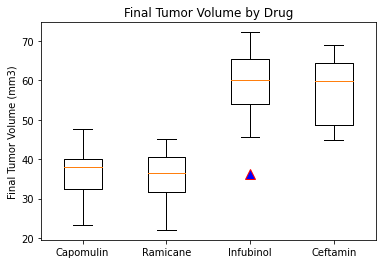

In [74]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fliers = dict(marker="^", markerfacecolor="b", markersize=10, markeredgecolor="red" )

plt.boxplot(tumorvol, flierprops=fliers)

plt.title("Final Tumor Volume by Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots

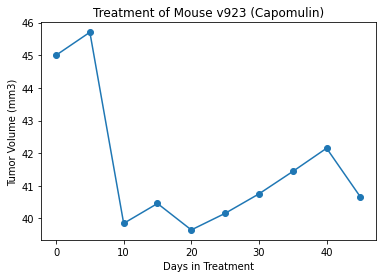

In [75]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = merged_data.loc[merged_data['Mouse ID'] == 'v923']


plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Days in Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Treatment of Mouse v923 (Capomulin)")

plt.show()

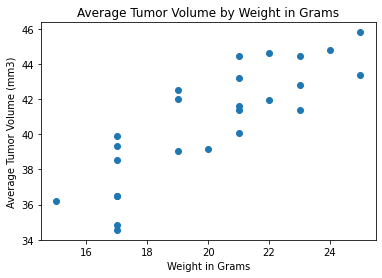

In [76]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']

avgvol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

avgvol_df = pd.merge(capomulin_df, avgvol_df, on='Mouse ID')
avgvol_merged = avgvol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
avgvol_merged

x = avgvol_merged['Weight (g)']
y = avgvol_merged['Average Tumor Volume']

plt.scatter(x, y)

plt.xlabel("Weight in Grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight in Grams')

plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


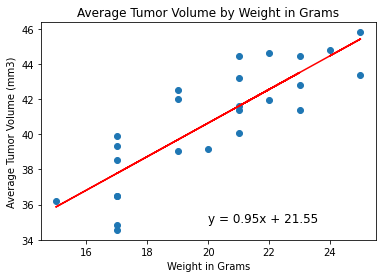

In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']

avgvol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

avgvol_df = pd.merge(capomulin_df, avgvol_df, on='Mouse ID')
avgvol_merged = avgvol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
avgvol_merged

x = avgvol_merged['Weight (g)']
y = avgvol_merged['Average Tumor Volume']

correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,35),fontsize=12,color="black")

# Add labels and title to plot
plt.xlabel("Weight in Grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight in Grams')
plt.show()
